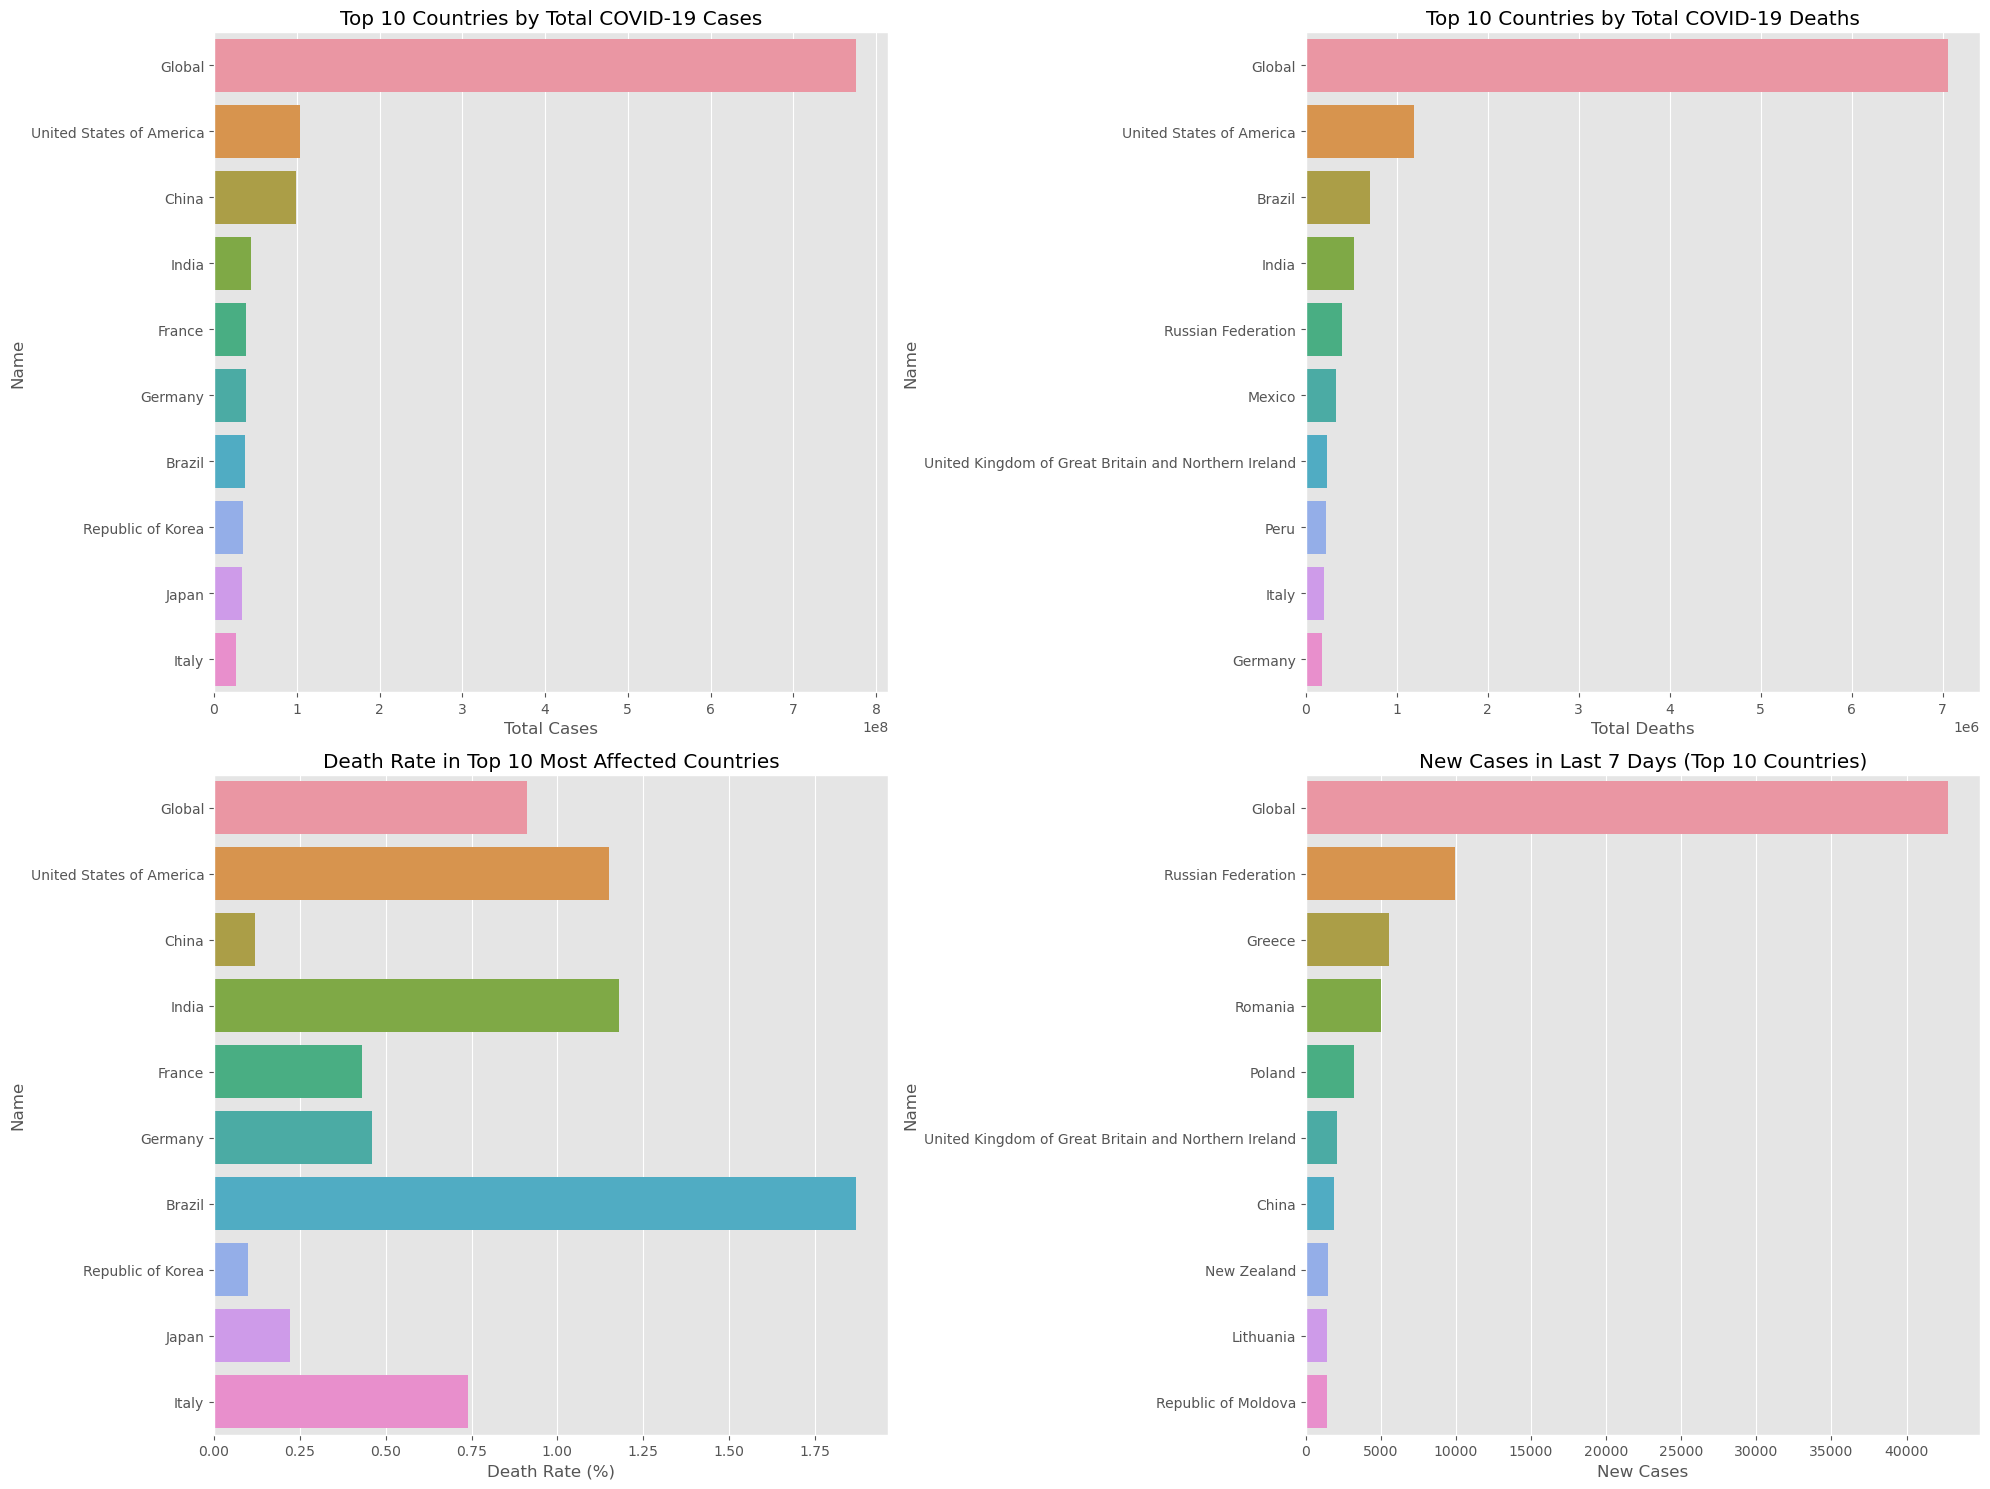


Summary Statistics:
--------------------------------------------------
Total Global Cases: 1,551,834,206
Total Global Deaths: 14,116,762
Global Death Rate: 0.91%
New Cases (7 days): 85,512
--------------------------------------------------


In [2]:
# Import required libraries if not already imported
import matplotlib.pyplot as plt
import seaborn as sns  # Make sure seaborn is imported

# Top 10 countries by total cases
top_10_cases = df.nlargest(10, 'Cases - cumulative total')

# Create figure with subplots
# Use a valid matplotlib style instead of 'seaborn'
plt.style.use('ggplot')  # Alternative: 'fivethirtyeight', 'bmh', etc.
# Or remove the style line and just use seaborn's set theme:
# sns.set_theme()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))

# 1. Bar plot of top 10 countries by total cases
sns.barplot(data=top_10_cases, 
            x='Cases - cumulative total', 
            y='Name',
            ax=ax1)
ax1.set_title('Top 10 Countries by Total COVID-19 Cases')
ax1.set_xlabel('Total Cases')

# 2. Bar plot of top 10 countries by total deaths
top_10_deaths = df.nlargest(10, 'Deaths - cumulative total')
sns.barplot(data=top_10_deaths,
            x='Deaths - cumulative total',
            y='Name',
            ax=ax2)
ax2.set_title('Top 10 Countries by Total COVID-19 Deaths')
ax2.set_xlabel('Total Deaths')

# 3. Death rate comparison for top 10 affected countries
sns.barplot(data=top_10_cases,
            x='Death Rate',
            y='Name',
            ax=ax3)
ax3.set_title('Death Rate in Top 10 Most Affected Countries')
ax3.set_xlabel('Death Rate (%)')

# 4. New cases in last 7 days for countries with reported cases
recent_cases = df[df['Cases - newly reported in last 7 days'].notna()]
recent_cases = recent_cases.nlargest(10, 'Cases - newly reported in last 7 days')
sns.barplot(data=recent_cases,
            x='Cases - newly reported in last 7 days',
            y='Name',
            ax=ax4)
ax4.set_title('New Cases in Last 7 Days (Top 10 Countries)')
ax4.set_xlabel('New Cases')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print("-" * 50)
print(f"Total Global Cases: {df['Cases - cumulative total'].sum():,.0f}")
print(f"Total Global Deaths: {df['Deaths - cumulative total'].sum():,.0f}")
print(f"Global Death Rate: {(df['Deaths - cumulative total'].sum() / df['Cases - cumulative total'].sum() * 100):.2f}%")
print(f"New Cases (7 days): {df['Cases - newly reported in last 7 days'].sum():,.0f}")
print("-" * 50)